# Hyperparamater tuning

### Use Ridge regression with variable alpha to find best 20 degree polynomial to fit that fits the data

In [20]:
# Import required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [8]:
# Open the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

In [7]:
# Take a quick look at the data
df.head()

x         f         y
0  0.000000  1.000000  0.923951
1  0.020408  1.039176  1.028283
2  0.040816  1.075173  1.069739
3  0.061224  1.108144  1.077327
4  0.081633  1.138242  1.105688

In [9]:
# Find the 'values' for each column of the dataframe. Use .values to do so after selecting the column
x = df[_]

y = df[_]

# also use the 'f' column to make a list of the 'true' value of the function
f = df[_]

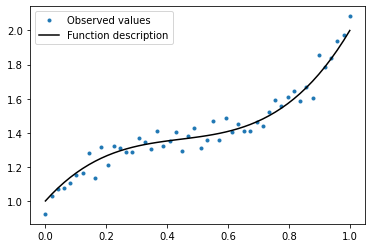

In [10]:
# Visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()
# Plot x vs y values
ax.plot(_,_, '.', label = 'Observed values')
# Plot x vs true function value
ax.plot(_,_, 'k-', label = 'Function description')
ax.legend(loc = 'best')

In [34]:
# We will learn a new way of making test, train splits by using index split
# get an index of training and valid data
len_vals = np.arange(_)
itrain, ivalid= train_test_split(_, train_size = 0.8)

In [35]:
# Use the index to separate training and valid data for the predictor x & the response variable y 
xtrain,ytrain = x[_], y[_]
xvalid, yvalid= x[_],y[_]

In [36]:
# This a helper function that will help you plot the estimated polynomial regression along with the true values & true function
def plot_functions(d, est, ax, df, alpha, xvalid, Xvalid, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", ms=5, alpha=0.3)
    ax.plot(xvalid, yvalid, 's', label="validation", ms=5, alpha=0.3)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(d).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', ms=7, alpha=0.8, label="alpha = %s" % str(alpha))

    # This is just aesthetics
    ax.set_ylim((1, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

In [37]:
# This helper function will help you plot the magnitude of the coefficients of the polynomial regression
# The values will help you determine which powers of the feature are most influential
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

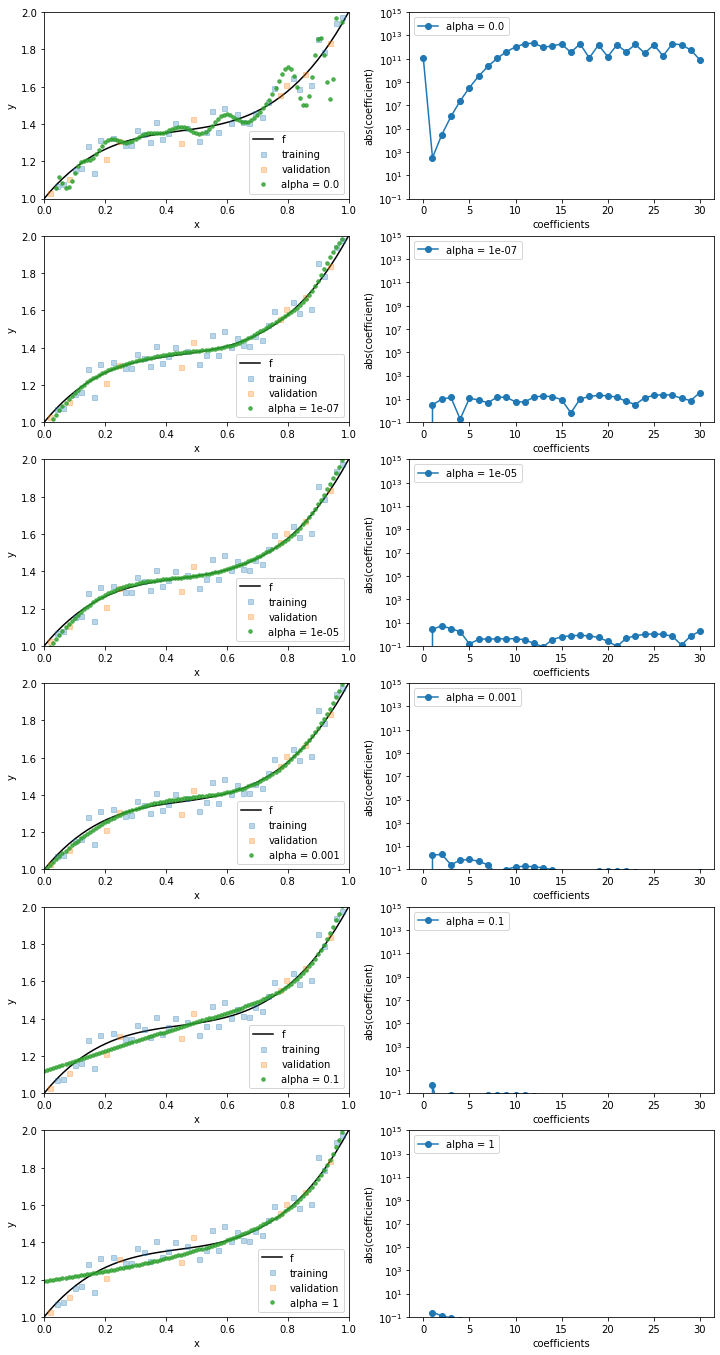

In [38]:
fig, rows = plt.subplots(6, 2, figsize=(12, 24))
d=30
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]
training_error, validation_error = [],[]
Xtrain = PolynomialFeatures(_).fit_transform(_)
Xvalid= PolynomialFeatures(_).fit_transform(_)
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    
    # For each i, fit a ridge regression on training set
    est = Ridge(alpha=_)
    est.fit(_,_)
    ytrain_pred = est.predict(_)
    yvalid_pred = est.predict(_)
    # Compute the training and validation errors
    mse_train = _
    mse_val = _
    
    # Add that value to the list 
    training_error.append(_)
    validation_error.append(_)
    
    # Use helper functions plot_functions & plot_coefficients to visualise the plots
    plot_functions(d, est, l, df, alpha, xvalid, Xvalid, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

In [39]:
# Find the best value of hyper parameter, which gives the least error on the validdata

best_hyper = ___

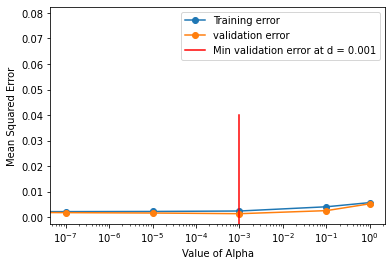

In [40]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots()
ax.plot(alphas, training_error, marker = 'o', label = 'Training error')
ax.plot(alphas, validation_error, marker = 'o', label = 'validation error')
ax.axvline(_, 0, 0.5, color = 'r', label = f'Min validation error at d = {best_hyper}')
ax.set_xlabel('Value of Alpha')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_xscale('log')